In [53]:
import pandas as pd
df = pd.read_csv("rain_forecasting.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1000 non-null   object 
 1   Location      1000 non-null   object 
 2   MinTemp       1000 non-null   float64
 3   MaxTemp       1000 non-null   float64
 4   Humidity9am   1000 non-null   int64  
 5   Humidity3pm   1000 non-null   int64  
 6   Pressure9am   1000 non-null   float64
 7   Pressure3pm   1000 non-null   float64
 8   WindSpeed9am  1000 non-null   int64  
 9   WindSpeed3pm  1000 non-null   int64  
 10  RainToday     1000 non-null   object 
 11  RainTomorrow  1000 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 93.9+ KB


In [54]:
df.head()


,Date,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow
0,2025-01-01,Mumbai,20.6,28.7,67,37,1001.4,1007.0,10,13,No,No
1,2025-01-02,New Delhi,29.3,35.8,46,34,1008.3,1005.7,10,5,No,No
2,2025-01-03,Mumbai,26.0,42.5,74,89,1009.6,998.9,16,23,Yes,Yes
3,2025-01-04,Kolkata,24.0,39.6,94,38,1010.6,1002.3,16,9,No,No
4,2025-01-05,New Delhi,17.3,41.1,67,30,1005.6,999.4,14,23,Yes,No


In [55]:
df['Date'] = pd.to_datetime(df['Date'])

In [56]:
df.head()

,Date,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow
0,2025-01-01,Mumbai,20.6,28.7,67,37,1001.4,1007.0,10,13,No,No
1,2025-01-02,New Delhi,29.3,35.8,46,34,1008.3,1005.7,10,5,No,No
2,2025-01-03,Mumbai,26.0,42.5,74,89,1009.6,998.9,16,23,Yes,Yes
3,2025-01-04,Kolkata,24.0,39.6,94,38,1010.6,1002.3,16,9,No,No
4,2025-01-05,New Delhi,17.3,41.1,67,30,1005.6,999.4,14,23,Yes,No


In [57]:
df = df.dropna()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1000 non-null   datetime64[ns]
 1   Location      1000 non-null   object        
 2   MinTemp       1000 non-null   float64       
 3   MaxTemp       1000 non-null   float64       
 4   Humidity9am   1000 non-null   int64         
 5   Humidity3pm   1000 non-null   int64         
 6   Pressure9am   1000 non-null   float64       
 7   Pressure3pm   1000 non-null   float64       
 8   WindSpeed9am  1000 non-null   int64         
 9   WindSpeed3pm  1000 non-null   int64         
 10  RainToday     1000 non-null   object        
 11  RainTomorrow  1000 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 93.9+ KB


In [59]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [60]:
df['Year']       = df['Date'].dt.year
df['DayOfWeek']  = df['Date'].dt.dayofweek
df['IsWeekend']  = df['DayOfWeek'].isin([5,6]).astype(int)


In [61]:
df.head()

,Date,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow,Year,DayOfWeek,IsWeekend
0,2025-01-01,Mumbai,20.6,28.7,67,37,1001.4,1007.0,10,13,0,0,2025,2,0
1,2025-01-02,New Delhi,29.3,35.8,46,34,1008.3,1005.7,10,5,0,0,2025,3,0
2,2025-01-03,Mumbai,26.0,42.5,74,89,1009.6,998.9,16,23,1,1,2025,4,0
3,2025-01-04,Kolkata,24.0,39.6,94,38,1010.6,1002.3,16,9,0,0,2025,5,1
4,2025-01-05,New Delhi,17.3,41.1,67,30,1005.6,999.4,14,23,1,0,2025,6,1


In [62]:
df['DeltaHum']   = df['Humidity3pm']  - df['Humidity9am']
df['DeltaPress'] = df['Pressure3pm']  - df['Pressure9am']
df['DeltaWind']  = df['WindSpeed3pm'] - df['WindSpeed9am']

In [63]:
df['AvgTemp'] = (df['MinTemp'] + df['MaxTemp']) / 2

In [64]:
df.head()

,Date,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow,Year,DayOfWeek,IsWeekend,DeltaHum,DeltaPress,DeltaWind,AvgTemp
0,2025-01-01,Mumbai,20.6,28.7,67,37,1001.4,1007.0,10,13,0,0,2025,2,0,-30,5.6,3,24.65
1,2025-01-02,New Delhi,29.3,35.8,46,34,1008.3,1005.7,10,5,0,0,2025,3,0,-12,-2.6,-5,32.55
2,2025-01-03,Mumbai,26.0,42.5,74,89,1009.6,998.9,16,23,1,1,2025,4,0,15,-10.7,7,34.25
3,2025-01-04,Kolkata,24.0,39.6,94,38,1010.6,1002.3,16,9,0,0,2025,5,1,-56,-8.3,-7,31.80
4,2025-01-05,New Delhi,17.3,41.1,67,30,1005.6,999.4,14,23,1,0,2025,6,1,-37,-6.2,9,29.20


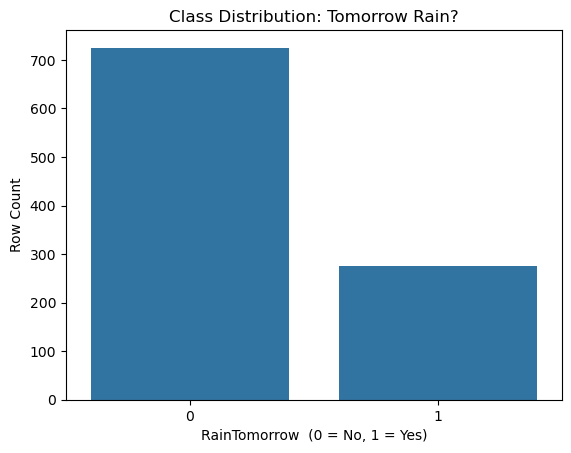

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='RainTomorrow', data=df)
plt.title('Class Distribution: Tomorrow Rain?')
plt.xlabel('RainTomorrow  (0 = No, 1 = Yes)')
plt.ylabel('Row Count')
plt.show()


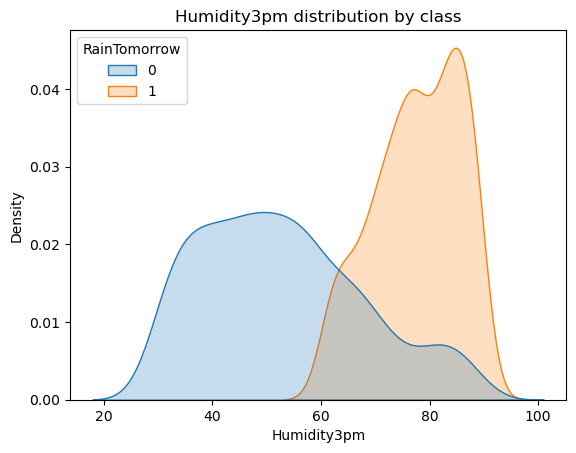

In [66]:
sns.kdeplot(data=df, x='Humidity3pm', hue='RainTomorrow', fill=True, common_norm=False)
plt.title('Humidity3pm distribution by class')
plt.show()


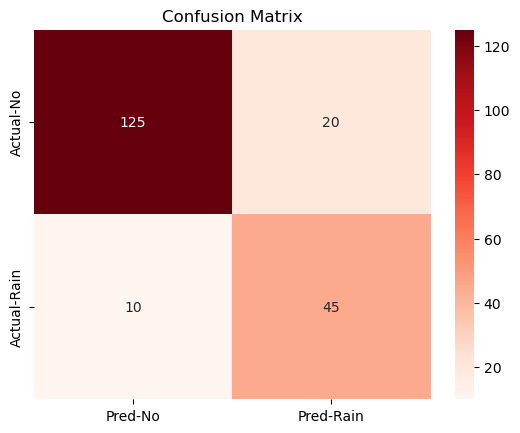

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Pred‑No','Pred‑Rain'],
            yticklabels=['Actual‑No','Actual‑Rain'])
plt.title('Confusion Matrix')
plt.show()


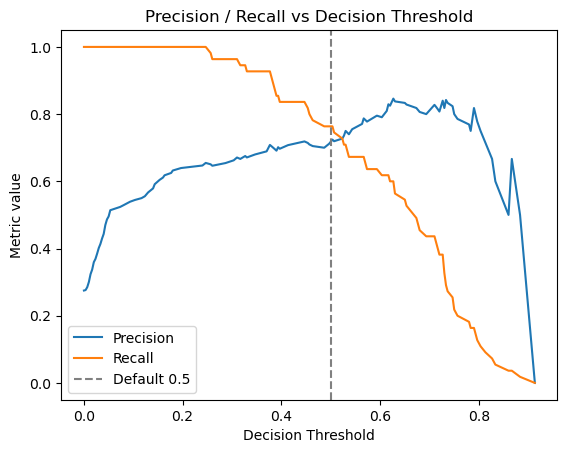

In [68]:
from sklearn.metrics import precision_recall_curve
import numpy as np

y_prob  = rf.predict_proba(X_test)[:,1]
prec, rec, thresh = precision_recall_curve(y_test, y_prob)

plt.plot(thresh, prec[:-1], label='Precision')
plt.plot(thresh, rec[:-1],  label='Recall')
plt.axvline(0.5, color='grey', linestyle='--', label='Default 0.5')
plt.xlabel('Decision Threshold')
plt.ylabel('Metric value')
plt.title('Precision / Recall vs Decision Threshold')
plt.legend()
plt.show()


In [69]:
df['RainTomorrow'].value_counts()


RainTomorrow
0    725
1    275
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Date','RainTomorrow'])
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)


In [73]:
X_train.dtypes.value_counts()


int64      8
float64    6
int32      2
object     1
Name: count, dtype: int64

In [74]:
df.select_dtypes(include='object').columns


Index(['Location'], dtype='object')

In [77]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)


KeyError: "None of [Index(['Location'], dtype='object')] are in the [columns]"

In [72]:
from xgboost import XGBClassifier
pos_weight = (y_train==0).sum() / (y_train==1).sum()   # ≈ 2.6

xgb = XGBClassifier(
        n_estimators=400, max_depth=5, learning_rate=0.05,
        subsample=0.9, colsample_bytree=0.8,
        scale_pos_weight=pos_weight, 
        eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)



ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Location: object

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC‑AUC:", round(roc_auc, 3))     


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

imp = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:15]
plt.figure(figsize=(6,4))
sns.barplot(x=imp.values, y=imp.index)
plt.title("Top 15 Feature Importances"); plt.tight_layout(); plt.show()

plt.figure(figsize=(5,4))
plt.plot(rec, prec)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision‑Recall Curve'); plt.grid(True); plt.show()


In [ ]:
import joblib
joblib.dump(xgb, "rain_predictor.pkl")
print("Model saved as rain_predictor.pkl")
